## <font color= #93133D> 1.1 Ecuación para las estrellas (Ley de Stefan-Boltzmann)

### <font color= #4B1393> 1.2 OBJETIVOS

<Strong> 1.1 Objetivo General </Strong> 

-Buscar una fórmula que relacione la luminosidad, el radio y la temperatura a la que se encuentran diversas estrellas del espacio; y compararla con la ecuación de Stefan-   Boltzmann.

<Strong> 1.2 Objetivos Específicos </Strong>

-Graficar  las tres variables de los datos de las estrellas investigadas (87 estrellas).

-Graficar la superficie con la función ajustada  que se forma con los datos anteriores.

-Utilizar la ecuación resultante para poder encontrar un número aproximado de alguna variable desconocida de otras estrellas.

-Encontrar el error comparando la superficie ajustada con los valores reales y la ecuación de Stefan Boltzmann

### <font color= #4B1393> 1.3 MODELO QUE REPRESENTA EL PROBLEMA.

<Strong>-Función a optimizar:</Strong> $L=4πσR^2T^4$

<Strong>-Características:</Strong> La luminosidad es directamente proporcional al cuadrado del radio y a la cuarta potencia de la temperatura; por lo que el cambio más significativo sería en la temperatura, ya que nos daría un mayor cambio en la luminosidad.

<Strong>-Variables:</Strong> 
L = luminosidad (W);
T = temperatura (K);
R = radio (m).

<Strong>-Equivalencias:</Strong> 
- 1 Luminosidad solar = 4x10^26 W
- 1 Radio solar = 695,700 km


### <font color= #4B1393> 1.4 SIMULACIONES.

Código para resolver el problema de ajuste de superficie:

In [23]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import scipy.optimize as opt
%matplotlib inline

In [24]:
stars = pd.read_csv("estrellas.csv")

In [25]:
stars.tail()

,Nombre de la estrella,Luminosidad en unidades solares,Radio,Temperatura
83,HD 38529,6.60,2.44,5370
84,Tabit,2.60,2.70,6400
85,Alpha Centauri A,1.40,1.20,5790
86,Chi1 Orionis,1.05,1.05,5942
87,Sol,1.00,1.00,5778


In [26]:
stars.shape

(88, 4)

In [27]:
radio = stars[["Radio"]].values
temp = stars[["Temperatura"]].values
lum = stars[["Luminosidad en unidades solares"]].values

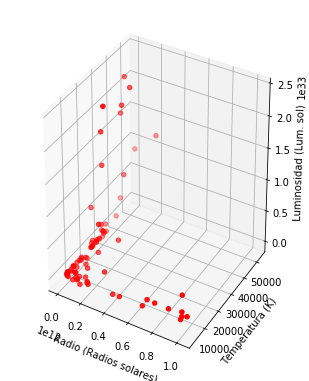

In [30]:
fig = plt.figure(figsize=(4,5))
ax = Axes3D(fig)
ax.scatter(radio*695700000, temp, lum*(4*(10**26)) ,c = "r", marker= 'o')
ax.set_xlabel("Radio (Radios solares)")
ax.set_ylabel("Temperatura (K)")
ax.set_zlabel("Luminosidad (Lum. sol)")
plt.show()

In [31]:
def fun_obj (beta,radio,temp, lum):
    mult = []
    for i in range(87):
        mult.append(((lum[i][0]*(4*(10**26)))-beta[0]*
                     ((radio[i][0]*695700000)**2)*(temp[i][0]**4))**2)
    return np.sum(mult)

In [32]:
beta_0 = 1

In [33]:
res = opt.minimize(fun_obj, beta_0, args = (radio,temp,lum))
res.x

array([-1.73069278e-09])

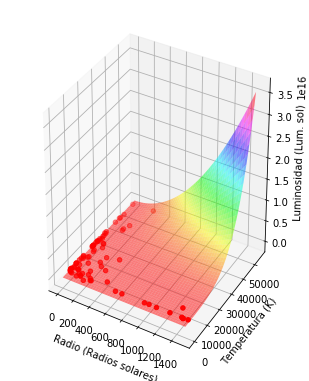

In [38]:
fig = plt.figure(figsize=(4,5))
ax = Axes3D(fig)
x= np.linspace(0,1500)
y= np.linspace(0,55000)
X, Y = np.meshgrid(x, y)
Z = (-res.x)*X**2*Y**4 
ax.scatter(radio, temp, lum ,c = "r", marker= 'o')
ax.plot_surface(X, Y, Z,cmap = "hsv", alpha=0.5  )
ax.set_xlabel("Radio (Radios solares)")
ax.set_ylabel("Temperatura (K)")
ax.set_zlabel("Luminosidad (Lum. sol)")
plt.show()

¿Condujo el algoritmo de optimización a una solución factible?

In [39]:
## Calcular el error
err = [87]
for i in range(87):
    lum_ajus = (-res.x)*((radio[i][0]*695700000)**2)*(temp[i][0]**4)
    err.append(((lum[i][0]*(4*(10**26)))-lum_ajus)/((lum[i][0])*(4*(10**26))))
    
ErrTotal=np.sum(err)/87
print(ErrTotal)

1.9895982364922278


### <font color= #4B1393> 1.5 VISUALIZACIÓN DE RESULTADOS DE SIMULACIÓN.

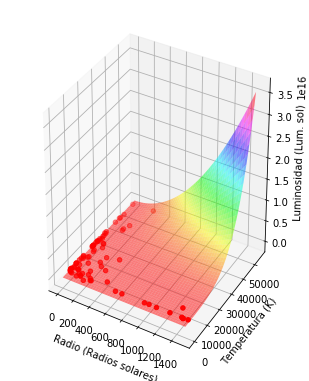

In [40]:
fig = plt.figure(figsize=(4,5))
ax = Axes3D(fig)
x= np.linspace(0,1500)
y= np.linspace(0,55000)
X, Y = np.meshgrid(x, y)
Z = (-res.x)*X**2*Y**4 
ax.scatter(radio, temp, lum ,c = "r", marker= 'o')
ax.plot_surface(X, Y, Z,cmap = "hsv", alpha=0.5  )
ax.set_xlabel("Radio (Radios solares)")
ax.set_ylabel("Temperatura (K)")
ax.set_zlabel("Luminosidad (Lum. sol)")
plt.show()

### <font color= #4B1393> 1.6 CONCLUSIONES.

Este proyecto nos ayudo a darnos cuenta que las aplicaciones de los temas teoricos vistos en clase toman valor cuando echamos a andar nuestra creatividad y los ponemos al servicio de problemas o situaciones de nuestra realidad. 
En este proyecto en específico pudimos utilizar en la astrofisica el tema de ajuste de curvas, cuya naturaleza la aterrizamos al ajuste de una superficie, pues la situación a la que nos enfrentabamos implicaba varias variables. Pudimos ver de cerca la relación radio-luminosidad-temperatura de las estrellas más luminosas que conocemos y pudimos observar cierta relación que nos dice que la temperatura y el radio son directamente proporcionales a la luminosidad de una estrella.
Con la optimización de la función obtuvimos el valor de la constante beta, la cual tenía un error absoluto de 0.997571, comparada con el valor real.
Calculamos después la luminosidad de las estrellas y las comparamos con los valores reales que se encuentran en la tabla estrellas.csv, para después conseguir un error total con la media de todos los valores; obteniendo así una función que se ajusto aproximadamente a la fórmula de la ley de Stefan-Boltzmann.
El error absoluto total fue de 1.9895982364922278, esto es debido a que no son suficientes los datos para realizar un ajuste más exacta; además de que algunas estrellas se descubrió recientemente que son sistemas de dos estrellas o más, por lo que la luminosidad no fue de la estrella por individual. 
Además de que la ley de Stefan-Boltzmann tiene un error aproximado de 2% pues la temperatura real del sol calculada con técnicas modernas difiere de la calculada anteriormente.
Tomando en cuenta estos factores, la aproximación fue exitosa, pues la mayoría de los datos se ajustaron a la superficie. 

### <font color= #4B1393> 1.7 REFERENCIAS.

- Desconocido. (2016). $Anexo: Estrellas$ $más$ $luminosas.$ 11 de Junio del 2018, de Wikipedia Sitio web: https://es.wikipedia.org/wiki/Anexo:Estrellas_m%C3%A1s_luminosas

- Valeev, A. F.. (2014). $Spectral$ $analysis$ $of$ $LBV$ $stars$ $in$ $M31: AF$ $And$ $and$ $Var$ $15.$ 11 de junio del 2018, de International Astronomical Union Sitio web: https://www.cambridge.org/core/services/aop-cambridge-core/content/view/S1743921314006607

- Anónimo. (2007). $Wray$ $17-96$. 11 de junio del 2018, de Jumk.de Sitio web: https://jumk.de/astronomie/big-stars/wray-17-96.shtml